In [1]:
# Import
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.enable_eager_execution()

1.13.1


In [2]:
# Load Data 
filename = 'C:\\Users\\deniz\\Desktop\\Thesis of ML for AutoPas\\Data\\Batch3\\b3e1-6.txt'
arr = np.genfromtxt(filename, delimiter=',')
print(arr.shape)

(878, 30)


In [3]:
# Define how many parameters you have (it is assumed that the rest are classes)
parameter_count = 7

In [4]:
# Copy the array
data = np.copy(arr)

# Shuffle data and take 80% as test data
np.random.shuffle(data)
test_size = (np.ceil(data.shape[0] * 4 / 5)).astype(int)
train_params = data[test_size:,0:parameter_count]
train_labels = np.argmin(data[test_size:,parameter_count:], 1).astype(int)
test_params = data[:test_size,0:parameter_count]
test_labels = np.argmin(data[:test_size,parameter_count:], 1).astype(int)


# Posible normalization functions
def normalize01(array):
    divisor = np.max(array)
    for i in range(array.size):
        array[i] = array[i] / divisor
        
def normalize02(array):
    divisor = np.max(array)
    sub = np.min(array)
    for i in range(array.size):
        array[i] = (array[i] - sub) / divisor
        
# Normalize the data
np.apply_along_axis(normalize02, 0, train_params)
np.apply_along_axis(normalize02, 0, test_params)
print(train_params[0])

[0.         0.5        0.         0.         1.         0.
 0.00699305]


In [5]:
# Check how the total data is distributed among the labels
dist = np.bincount(np.concatenate((train_labels, test_labels)))
print(dist)
print(np.argmax(dist))
print(np.max(dist) / data.shape[0])

[281   9  54   0  33   0   0  43   0   0   0   0   5   3   0   0   0   1
   0   0 409   0  40]
20
0.46583143507972663


In [6]:
# Model
model = keras.Sequential([
    #keras.layers.Dense(parameter_count, activation=tf.nn.relu, input_dim=7),
    keras.layers.Dense(parameter_count, activation=tf.nn.relu),
    keras.layers.Dense(arr.shape[1] - parameter_count, activation=tf.nn.softmax)
])

opt = keras.optimizers.Adam(lr=0.25)

model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
print(arr.shape[1] - parameter_count)

23


In [8]:
# Fun
model.fit(train_params, train_labels , epochs=50)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/50
175/175 [==============================] - 1s 3ms/sample - loss: 1.8406 - acc: 0.3600
Epoch 2/50
175/175 [==============================] - 0s 109us/sample - loss: 1.0826 - acc: 0.5943
Epoch 3/50
175/175 [==============================] - 0s 126us/sample - loss: 1.0052 - acc: 0.6514
Epoch 4/50
175/175 [==============================] - 0s 108us/sample - loss: 0.9312 - acc: 0.6400
Epoch 5/50
175/175 [==============================] - 0s 120us/sample - loss: 0.8860 - acc: 0.6457
Epoch 6/50
175/175 [==============================] - 0s 97us/sample - loss: 0.8936 - acc: 0.6743
Epoch 7/50
175/175 [==============================] - 0s 91us/sample - loss: 0.8428 - acc: 0.6229
Epoch 8/50
175/175 [==============================] - 0s 91us/sample - loss: 0.7843 - acc: 0.6971
Epoch 9/50
175/175 [==============================] - 0s 103us/sample - loss: 0.7490 - acc: 0.7143
Epoch 10/50
175/175 [=====================

In [9]:
predictions = model.predict(test_params)
test_loss, test_acc = model.evaluate(test_params, test_labels)
print('Test accuracy:', test_acc)

703/703 [==============================] - 0s 171us/sample - loss: 1.0948 - acc: 0.7340
Test accuracy: 0.73399717


In [10]:
# Print prediction, result, and how certain the result is
best = np.argsort(predictions)
print(' Best  Guess1  Guess2  Certainty1      Certainty2')
for i in range(test_size):
    print(' ', test_labels[i], '\t', best[i][-1], '\t', best[i][-2], '\t', \
          "{:.2%}".format(predictions[i][best[i][-1]]), '\t', "{:.2%}".format(predictions[i][best[i][-2]]))

 Best  Guess1  Guess2  Certainty1      Certainty2
  0 	 20 	 0 	 60.06% 	 32.36%
  20 	 20 	 22 	 96.35% 	 3.59%
  0 	 0 	 20 	 99.10% 	 0.70%
  0 	 0 	 20 	 62.46% 	 35.89%
  20 	 20 	 0 	 93.27% 	 5.23%
  0 	 0 	 20 	 87.29% 	 11.59%
  20 	 20 	 0 	 59.87% 	 34.34%
  20 	 20 	 0 	 57.70% 	 40.79%
  20 	 20 	 0 	 95.57% 	 3.16%
  22 	 22 	 7 	 56.60% 	 43.39%
  0 	 0 	 20 	 99.64% 	 0.23%
  0 	 20 	 0 	 80.11% 	 16.20%
  2 	 7 	 1 	 73.01% 	 17.79%
  2 	 4 	 1 	 57.47% 	 42.29%
  20 	 20 	 22 	 83.51% 	 16.49%
  20 	 20 	 22 	 97.97% 	 1.67%
  20 	 20 	 0 	 78.06% 	 17.17%
  20 	 20 	 22 	 84.87% 	 15.13%
  0 	 0 	 20 	 98.76% 	 0.99%
  0 	 0 	 20 	 55.32% 	 38.78%
  0 	 0 	 22 	 99.87% 	 0.07%
  4 	 7 	 4 	 61.98% 	 24.29%
  0 	 0 	 20 	 90.86% 	 8.05%
  22 	 22 	 7 	 40.77% 	 27.24%
  4 	 4 	 1 	 79.90% 	 15.22%
  7 	 7 	 1 	 72.78% 	 15.16%
  20 	 20 	 0 	 90.81% 	 5.49%
  20 	 20 	 0 	 96.55% 	 1.85%
  20 	 20 	 0 	 81.88% 	 15.19%
  0 	 0 	 22 	 59.62% 	 33.95%
  0 	 0 	 20 	 58.

  20 	 20 	 0 	 71.22% 	 13.98%
  0 	 0 	 20 	 99.07% 	 0.71%
  20 	 20 	 22 	 80.82% 	 19.18%
  0 	 20 	 0 	 88.90% 	 9.82%
  20 	 20 	 0 	 75.63% 	 13.41%
  20 	 20 	 22 	 94.20% 	 5.80%
  20 	 20 	 0 	 79.57% 	 14.59%
  20 	 20 	 0 	 77.89% 	 17.24%
  0 	 0 	 20 	 98.68% 	 0.93%
  1 	 7 	 1 	 71.66% 	 13.82%
  20 	 20 	 22 	 85.07% 	 14.93%
  0 	 0 	 20 	 78.66% 	 19.82%
  20 	 20 	 22 	 96.50% 	 3.43%
  20 	 20 	 0 	 58.68% 	 35.61%
  4 	 7 	 4 	 61.95% 	 24.31%
  2 	 4 	 1 	 61.19% 	 38.52%
  20 	 20 	 22 	 93.44% 	 6.56%
  0 	 0 	 20 	 84.32% 	 10.73%
  0 	 0 	 20 	 89.19% 	 9.77%
  20 	 20 	 22 	 92.36% 	 7.64%
  7 	 7 	 4 	 64.60% 	 22.33%
  20 	 20 	 0 	 81.58% 	 15.37%
  0 	 20 	 0 	 89.26% 	 9.53%
  22 	 22 	 20 	 92.98% 	 6.27%
  0 	 0 	 20 	 93.95% 	 5.24%
  0 	 20 	 0 	 92.27% 	 4.16%
  0 	 0 	 22 	 99.95% 	 0.04%
  0 	 0 	 22 	 49.12% 	 36.31%
  2 	 4 	 1 	 79.76% 	 14.64%
  20 	 20 	 0 	 74.81% 	 15.53%
  2 	 4 	 1 	 59.77% 	 39.96%
  20 	 7 	 20 	 48.10% 	 33.52%
  0 	

  20 	 20 	 22 	 92.63% 	 7.37%
  0 	 20 	 0 	 88.70% 	 9.98%
  20 	 0 	 20 	 99.80% 	 0.11%
  0 	 0 	 20 	 95.11% 	 4.52%
  0 	 0 	 20 	 97.87% 	 1.81%
  20 	 0 	 20 	 88.39% 	 10.93%
  2 	 7 	 2 	 67.79% 	 12.28%
  20 	 0 	 20 	 63.66% 	 34.79%
  0 	 0 	 20 	 99.71% 	 0.18%
  20 	 20 	 0 	 83.24% 	 14.30%
  20 	 20 	 0 	 95.81% 	 2.26%
  0 	 0 	 20 	 98.88% 	 0.89%
  0 	 0 	 20 	 98.42% 	 1.32%
  2 	 7 	 2 	 68.61% 	 12.22%
  20 	 20 	 0 	 92.87% 	 3.49%
  4 	 7 	 1 	 98.84% 	 1.13%
  0 	 0 	 20 	 93.86% 	 5.65%
  20 	 20 	 0 	 72.84% 	 14.60%
  20 	 20 	 0 	 90.68% 	 8.26%
  0 	 22 	 20 	 38.89% 	 31.93%
  20 	 20 	 0 	 76.85% 	 19.38%
  2 	 7 	 4 	 62.53% 	 23.89%
  2 	 4 	 1 	 62.00% 	 37.66%
  0 	 0 	 20 	 97.38% 	 2.27%
  7 	 7 	 20 	 44.55% 	 38.02%
  2 	 4 	 1 	 61.97% 	 37.73%
  20 	 20 	 22 	 86.39% 	 13.61%
  0 	 0 	 20 	 93.28% 	 5.88%
  20 	 20 	 0 	 88.48% 	 6.73%
  20 	 20 	 0 	 82.11% 	 15.04%
  20 	 20 	 22 	 97.13% 	 2.70%
  20 	 20 	 0 	 73.36% 	 14.82%
  0 	 0 	 22

In [11]:
# Print general statistics about in how many guesses the AI would be correct
correct = np.zeros(best.shape[1])
most_occuring = np.sort(np.bincount(test_labels))[::-1]
for i in range(test_size):
    for j in range(correct.size):
        if best[i][-j-1] == test_labels[i]:
            correct[j] = correct[j] + 1
            break
np.set_printoptions(precision=3)
print('The count of guesses until correct choice:', correct.astype(int))
print('Cumilative chance that the choice was correct by:', \
      np.apply_along_axis(lambda x: x / test_size, 0, np.cumsum(correct))[0:5])
print('The count of most occuring tests:', most_occuring)
print('Cumilative chance that the choice was correct by:', \
      np.apply_along_axis(lambda x: x / test_size, 0, np.cumsum(most_occuring))[0:5])

The count of guesses until correct choice: [516 124  28   6  17   1   0   2   0   0   3   1   1   0   0   2   0   1
   0   1   0   0   0]
Cumilative chance that the choice was correct by: [0.734 0.91  0.95  0.959 0.983]
The count of most occuring tests: [338 223  44  30  29  24   6   5   3   1   0   0   0   0   0   0   0   0
   0   0   0   0   0]
Cumilative chance that the choice was correct by: [0.481 0.798 0.861 0.903 0.945]


In [12]:
# Display relative timing of all experiments, and print the ones which are relatively close
timings = np.apply_along_axis(lambda x: np.sort(x), 1, arr[:, parameter_count:])
for i in range(timings.shape[0]):
    fastest = timings[i][0]
    for j in range(timings.shape[1]):
        timings[i][j] = timings[i][j] / fastest

for i in range(3):
    print(timings[i])
    
print('The average:', np.average(timings, 0))

count = 0
for i in range(timings.shape[0]):
    if timings[i][1] < 1.01:
        count = count + 1
print(count, 'second best results from', timings.shape[0], 'are within 1 percent speed difference')

count = 0
for i in range(timings.shape[0]):
    for j in range(1, timings.shape[1]):
        if timings[i][j] < 1.01:
            count = count + 1
print(count, 'non best results from', timings.shape[0], 'are within 1 percent speed difference')


count = 0
for i in range(timings.shape[0]):
    if timings[i][1] < 1.05:
        count = count + 1
print(count, 'second best results from', timings.shape[0], 'are within 5 percent speed difference')

[  1.      1.243   1.491   1.775   2.199   2.7     2.918   2.973   3.011
   3.113   3.163   3.424   3.598   3.856   4.739   8.415   9.387  30.311
  36.325  44.505  54.523  55.985 176.71 ]
[  1.      1.084   1.617   1.994   2.046   2.091   2.1     2.256   2.504
   3.157   3.164   3.233   3.294   3.569   4.169   7.348   8.245   8.723
  40.941  52.384  53.185  60.682 227.976]
[  1.      1.263   1.453   1.771   1.869   1.968   2.038   2.166   2.745
   2.847   2.888   3.013   3.063   3.128   3.723   6.892   8.079   8.241
  24.658  45.437  55.282  56.516 140.458]
The average: [ 1.     1.435  2.41   3.08   3.687  4.098  4.695  5.136  5.71   6.347
  7.047  7.625  8.293  9.144 10.107 11.193 13.002 15.33  17.725 21.235
 25.066 30.43  41.326]
30 second best results from 878 are within 1 percent speed difference
34 non best results from 878 are within 1 percent speed difference
100 second best results from 878 are within 5 percent speed difference


In [13]:
# Count the first guesses that were relatively quick
test_timings = data[:test_size,parameter_count:]
for i in range(test_timings.shape[0]):
    fastest = np.min(test_timings[i])
    for j in range(test_timings.shape[1]):
        test_timings[i][j] = test_timings[i][j] / fastest
        
count = 0
for i in range(test_size):
    if test_timings[i][best[i][-1]] < 1.01:
        count = count + 1
print(count, 'first guesses from', test_size, 'are within 1 percent speed difference')

count = 0
for i in range(test_size):
    if test_timings[i][best[i][-1]] < 1.05:
        count = count + 1
print(count, 'first guesses from', test_size, 'are within 5 percent speed difference')

count = 0
for i in range(test_size):
    if test_timings[i][best[i][-1]] < 1.01 or test_timings[i][best[i][-2]] < 1.01:
        count = count + 1
print(count, 'of first two guesses from', test_size, 'are within 1 percent speed difference')

525 first guesses from 703 are within 1 percent speed difference
550 first guesses from 703 are within 5 percent speed difference
646 of first two guesses from 703 are within 1 percent speed difference


In [14]:
import pydot
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB'
)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [99]:
# This is an example regression model to see if keras can guess one value
target_value = -3
reg_data = np.copy(arr)
np.random.shuffle(reg_data)
reg_test_size = (np.ceil(data.shape[0] * 4 / 5)).astype(int)
reg_train_params = reg_data[:reg_test_size,:parameter_count]
reg_train_labels = reg_data[:reg_test_size,target_value]
reg_test_params = reg_data[reg_test_size:,:parameter_count]
reg_test_labels = reg_data[reg_test_size:,target_value]
#reg_train_data = reg_data.sample(frac=0.8,random_state=0)
#reg_test_data = reg_data.drop(reg_train_data.index)
#reg_labels = arr[:, parameter_count] # take 0th value

# Model
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(lr=0.001)

model2.compile(optimizer=opt, 
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

In [100]:
print(reg_train_params)
#print(reg_train_labels)
print(np.std(reg_train_params, 0))
print(np.mean(reg_train_params, 0))

def normalize03(array):
    divisor = np.std(array)
    sub = np.mean(array)
    for i in range(array.size):
        array[i] = (array[i] - sub) / divisor
        
np.apply_along_axis(normalize03, 0, reg_train_params)
np.apply_along_axis(normalize03, 0, reg_test_params)
print(reg_train_params[0])
print(reg_test_params[0])

reg_train_labels = np.log(reg_train_labels)
reg_test_labels = np.log(reg_test_labels)
print(reg_train_labels[0])
print(reg_test_labels[0])

[[2.000e-01 2.000e+00 0.000e+00 ... 0.000e+00 2.439e+04 1.951e+02]
 [1.000e-01 2.000e+00 0.000e+00 ... 0.000e+00 1.968e+04 1.575e+02]
 [1.000e-01 1.000e+00 0.000e+00 ... 1.000e+00 6.859e+03 6.859e+00]
 ...
 [1.000e-01 1.000e+00 0.000e+00 ... 0.000e+00 4.288e+04 1.562e+01]
 [3.000e-01 2.000e+00 1.000e+00 ... 0.000e+00 1.562e+04 1.250e+02]
 [1.000e-01 1.000e+00 1.000e+00 ... 0.000e+00 3.277e+04 3.277e+01]]
[8.218e-02 1.120e+00 4.519e-01 4.860e-01 4.707e-01 6.235e+04 1.043e+03]
[1.984e-01 2.498e+00 2.859e-01 3.826e-01 3.314e-01 2.266e+04 6.694e+02]
[ 0.019 -0.445 -0.633  1.27  -0.704  0.028 -0.455]
[-0.058 -0.37  -0.695  1.333 -0.677 -0.278 -0.386]
15.934516864181848
15.005567991043517


In [102]:
model2.fit(reg_train_params, reg_train_labels, epochs=150)

Epoch 1/150
703/703 [==============================] - 0s 81us/sample - loss: 1.0198 - mean_absolute_error: 0.8144 - mean_squared_error: 1.0198
Epoch 2/150
703/703 [==============================] - 0s 88us/sample - loss: 0.9867 - mean_absolute_error: 0.7999 - mean_squared_error: 0.9867
Epoch 3/150
703/703 [==============================] - 0s 95us/sample - loss: 0.9674 - mean_absolute_error: 0.7926 - mean_squared_error: 0.9674
Epoch 4/150
703/703 [==============================] - 0s 90us/sample - loss: 0.9575 - mean_absolute_error: 0.7825 - mean_squared_error: 0.9575
Epoch 5/150
703/703 [==============================] - 0s 129us/sample - loss: 0.9210 - mean_absolute_error: 0.7699 - mean_squared_error: 0.9210
Epoch 6/150
703/703 [==============================] - 0s 119us/sample - loss: 0.8957 - mean_absolute_error: 0.7582 - mean_squared_error: 0.8957
Epoch 7/150
703/703 [==============================] - 0s 101us/sample - loss: 0.8807 - mean_absolute_error: 0.7469 - mean_squared_err

703/703 [==============================] - 0s 114us/sample - loss: 0.2568 - mean_absolute_error: 0.3656 - mean_squared_error: 0.2568
Epoch 58/150
703/703 [==============================] - 0s 107us/sample - loss: 0.2598 - mean_absolute_error: 0.3729 - mean_squared_error: 0.2598 - loss: 0.2526 - mean_absolute_error: 0.3693 - mean_squared_error: 0.25
Epoch 59/150
703/703 [==============================] - 0s 88us/sample - loss: 0.2570 - mean_absolute_error: 0.3602 - mean_squared_error: 0.2570
Epoch 60/150
703/703 [==============================] - 0s 77us/sample - loss: 0.2456 - mean_absolute_error: 0.3573 - mean_squared_error: 0.2456
Epoch 61/150
703/703 [==============================] - 0s 77us/sample - loss: 0.2414 - mean_absolute_error: 0.3536 - mean_squared_error: 0.2414
Epoch 62/150
703/703 [==============================] - 0s 70us/sample - loss: 0.2463 - mean_absolute_error: 0.3642 - mean_squared_error: 0.2463
Epoch 63/150
703/703 [==============================] - 0s 68us/sampl

703/703 [==============================] - 0s 85us/sample - loss: 0.1482 - mean_absolute_error: 0.2730 - mean_squared_error: 0.1482
Epoch 113/150
703/703 [==============================] - 0s 101us/sample - loss: 0.1550 - mean_absolute_error: 0.2834 - mean_squared_error: 0.1550
Epoch 114/150
703/703 [==============================] - 0s 88us/sample - loss: 0.1597 - mean_absolute_error: 0.2826 - mean_squared_error: 0.1597
Epoch 115/150
703/703 [==============================] - 0s 88us/sample - loss: 0.1597 - mean_absolute_error: 0.2935 - mean_squared_error: 0.1597
Epoch 116/150
703/703 [==============================] - 0s 87us/sample - loss: 0.1647 - mean_absolute_error: 0.2908 - mean_squared_error: 0.1647
Epoch 117/150
703/703 [==============================] - 0s 77us/sample - loss: 0.1529 - mean_absolute_error: 0.2758 - mean_squared_error: 0.1529
Epoch 118/150
703/703 [==============================] - ETA: 0s - loss: 0.1454 - mean_absolute_error: 0.2608 - mean_squared_error: 0.14 

In [103]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             multiple                  512       
_________________________________________________________________
dense_24 (Dense)             multiple                  4160      
_________________________________________________________________
dense_25 (Dense)             multiple                  65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [104]:
loss, mae, mse = model2.evaluate(reg_test_params, reg_test_labels)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

175/175 [==============================] - 0s 1ms/sample - loss: 1.3092 - mean_absolute_error: 0.8637 - mean_squared_error: 1.3092
Testing set Mean Abs Error:  0.86


In [105]:
print(reg_test_predictions)
print(reg_test_labels)

[16.747 16.049 18.079 19.872 16.397 22.926 18.644 16.768 23.562 16.023
 16.276 17.781 16.426 20.23  14.055 16.189 17.275 21.004 18.737 14.974
 14.302 16.531 18.222 16.076 18.545 17.403 14.024 16.575 17.071 20.972
 19.766 16.671 17.629 19.251 16.021 14.297 16.069 14.288 16.506 17.618
 14.056 14.877 17.307 17.744 18.363 18.071 18.553 14.968 16.676 14.896
 17.878 17.471 18.567 18.355 17.639 16.882 14.97  14.97  19.151 18.785
 16.235 21.051 17.997 18.631 17.449 16.614 16.297 16.08  16.207 14.023
 15.765 16.395 18.446 14.971 17.071 19.561 19.513 18.385 16.685 16.251
 14.023 17.313 21.937 16.278 16.565 15.96  14.255 18.384 18.848 17.727
 15.141 17.884 15.823 17.863 16.749 16.334 17.508 18.146 18.427 17.503
 19.729 17.939 17.723 28.843 18.981 17.305 16.821 17.098 15.918 15.858
 16.825 15.68  18.947 19.898 16.278 18.366 16.93  16.025 16.89  15.934
 17.322 17.22  19.715 14.016 16.012 19.329 17.869 18.949 17.463 19.384
 17.974 18.615 18.79  17.821 20.415 17.774 16.41  16.295 19.093 16.984
 14.26

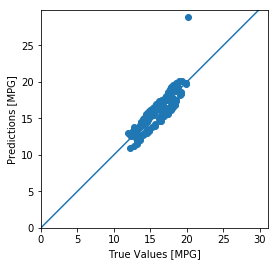

In [106]:
reg_test_predictions = model2.predict(reg_test_params).flatten()

plt.scatter(reg_test_labels, reg_test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [107]:
print(reg_test_predictions)
print(reg_test_labels)

[15.214 13.53  15.568 19.843 11.221 14.19  15.964 19.67  16.991 12.25
 28.896 13.963 14.941 17.705 13.304 15.52  13.262 12.037 17.199 14.54
 17.589 18.546 19.28  18.399 17.535 16.294 17.548 16.676 11.914 13.464
 16.353 17.834 15.957 10.984 20.131 13.06  16.33  17.101 16.535 13.723
 15.63  18.986 17.104 12.958 17.165 17.891 16.494 12.651 13.782 14.615
 17.505 13.934 12.995 15.412 13.195 14.552 17.374 11.898 13.352 13.235
 18.738 15.616 16.98  19.798 16.852 14.198 19.081 19.621 15.215 12.375
 14.208 20.057 14.586 14.464 14.283 14.218 19.478 15.978 17.757 18.608
 14.971 19.132 13.615 13.043 12.883 15.645 19.257 13.736 17.403 18.111
 15.623 14.172 16.413 12.589 15.465 12.662 18.553 13.451 15.715 15.091
 12.788 16.493 14.763 16.716 17.548 17.585 12.75  13.761 19.717 13.58
 14.516 16.257 19.514 18.047 15.278 11.454 12.957 17.848 12.1   19.491
 16.138 16.653 13.807 17.633 18.788 17.023 14.076 19.357 12.945 14.958
 16.041 17.031 16.083 18.056 12.861 16.949 16.079 16.1   16.051 18.145
 16.    1